In [1]:
from fastai.text import *
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm
import re
import pdb

In [2]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.40', '1.0.0')

In [3]:
torch.cuda.set_device(0)

In [5]:
!ls

models
panjabi_classification_data.csv
Panjabi_Classification_Model-BBC_Panjabi_News_Data.ipynb
panjabi_classification_one_hot.csv
Punjabi_Binary_Classification.csv
tmp


In [6]:
path = Path('/home/gaurav/PycharmProjects/nlp-for-panjabi/classification')

In [7]:
df = pd.read_csv(path/'Punjabi_Binary_Classification.csv')
df.head()

,text,ਭਾਰਤੀ ਰਾਜਨੀਤੀ
0,ਪੰਜਾਬ ਵਿੱਚ ਕਾਂਗਰਸ ਨੂੰ 'ਆਪ' ਨਾਲ ਗਠਜੋੜ ਦੀ ਲੋੜ ਨ...,True
1,ਕਨ੍ਹਈਆ ਦੇ ਮੁਸਲਮਾਨ ਬਣਨ ਬਾਰੇ ਵਾਇਰਲ ਵੀਡੀਓ ਦਾ ਸੱਚ...,True
2,"ਮੋਦੀ ਨੇ ਗੁਰਦਾਸਪੁਰ ’ਚ ਕਿਹਾ, 'ਇੱਕ ਪਰਿਵਾਰ ਨੇ ’84...",True
3,'ਜਿੰਨ੍ਹਾਂ ਲੋਕਾਂ ਕੋਲ ਸਮਾਰਟ ਫੋਨ ਨਹੀਂ ਹਨ ਕੀ ਮੋਦੀ...,True
4,ਕੀ ਬਾਲੀਵੁੱਡ ਨੇ ਨਰਿੰਦਰ ਮੋਦੀ ਅੱਗੇ ਅਯੁੱਧਿਆ 'ਚ ਰਾ...,True


In [8]:
print('Positive Examples', df['ਭਾਰਤੀ ਰਾਜਨੀਤੀ'].sum())
print('Negative Examples', df.shape[0] -df['ਭਾਰਤੀ ਰਾਜਨੀਤੀ'].sum())

Positive Examples 114
Negative Examples 670


In [9]:
df['text'][0]

' ਪੰਜਾਬ ਵਿੱਚ ਕਾਂਗਰਸ ਨੂੰ \'ਆਪ\' ਨਾਲ ਗਠਜੋੜ ਦੀ ਲੋੜ ਨਹੀਂ - ਕੈਪਟਨ      7 ਜਨਵਰੀ 2019                                              ਈਮੇਲ                                                 ਸਾਂਝਾ ਕਰੋ                                                 ਈਮੇਲ  ਈਮੇਲ    ਲਿੰਕ ਨੂੰ ਕਾਪੀ ਕਰੋ  https://www.bbc.com/punjabi/india-46781799  ਸਾਂਝਾ ਕਰਨ ਬਾਰੇ ਹੋਰ ਪੜ੍ਹੋ   ਸਾਂਝਾ ਕਰਨ ਵਾਲੇ ਪੈਨਲ ਨੂੰ ਬੰਦ ਕਰੋ              Image copyright Pradeep Gaur/Mint via Getty Images  "ਸੂਬੇ ਵਿੱਚ ਆਮ ਆਦਮੀ ਪਾਰਟੀ ਦੀ ਕੋਈ ਹੋਂਦ ਨਹੀਂ ਹੈ ਇਸ ਲਈ ਉਸ ਨਾਲ ਸਮਝੌਤੇ ਦੀ ਕੋਈ ਲੋੜ ਨਹੀਂ ਹੈ। ਹਾਲਾਂਕਿ ਆਪ ਜਾਂ ਕਿਸੇ ਵੀ ਹੋਰ ਪਾਰਟੀ ਨਾਲ ਸਮਝੌਤੇ ਬਾਰੇ ਆਖ਼ਰੀ ਫੈਸਲਾ ਹਾਈ ਕਮਾਂਡ ਹੀ ਲਵੇਗੀ।"ਇਹ ਵਿਚਾਰ ਪੰਜਾਬ ਦੇ ਮੁੱਖ ਮੰਤਰੀ ਕੈਪਟਨ ਅਮਰਿੰਦਰ ਸਿੰਘ ਨੇ ਕਾਂਗਰਸ ਪ੍ਰਧਾਨ ਰਾਹੁਲ ਗਾਂਧੀ ਨਾਲ ਮੁਲਾਕਾਤ ਤੋਂ ਬਾਅਦ ਪੱਤਰਕਾਰਾਂ ਨਾਲ ਗੱਲਬਾਤ ਦੌਰਾਨ ਪ੍ਰਗਟ ਕੀਤੇ। ਉਨ੍ਹਾਂ ਕਿਹਾ ਕਿ ਰਾਹੁਲ ਗਾਂਧੀ ਨਾਲ ਹੋਈ ਮੀਟਿੰਗ ਵਿੱਚ ਆਪ ਨਾਲ ਗਠਜੋੜ ਬਾਰੇ ਚਰਚਾ ਨਹੀਂ ਹੋਈ ਹੈ।ਆਗਾਮੀ ਲੋਕ ਸਭਾ ਚੋਣਾਂ ਵਿੱਚ ਆਮ ਆਦਮੀ ਪਾਰਟੀ ਨਾਲ ਕਿਸੇ ਸਮਝੌਤੇ ਦੀ ਲੋੜ ਤੋਂ ਇਨਕਾਰ ਕੀਤਾ ਅਤੇ ਕਿਹਾ ਕਿ ਕਾਂਗਰਸ ਸੂਬੇ ਵਿੱਚ ਆਪਣੇ ਦਮ ’ਤੇ ਹੀ ਸਾਰੀਆਂ 13 ਸੀਟਾਂ ਜਿੱਤੇਗੀ।ਸੂਬੇ ਦੀਆਂ ਸਾਰੀਆਂ ਲੋਕ ਸਭਾ ਸੀਟਾਂ ’ਤੇ

In [10]:
df.shape

(784, 2)

In [11]:
df[df['text'].isnull()].shape

(0, 2)

In [12]:
label_cols = list(range(1,df.shape[1]))

In [13]:
print(label_cols)

[1]


In [14]:
id_to_col = list(df.columns)

In [15]:
col_to_id = {}
for i, col in enumerate(id_to_col):
    col_to_id[col] = i

In [16]:
class PanjabiTokenizer(BaseTokenizer):
    def __init__(self, lang:str):
        self.lang = lang
        self.sp = spm.SentencePieceProcessor()
        self.sp.Load(str('../tokenizer/panjabi_lm.model'))
        
    def tokenizer(self, t:str) -> List[str]:
        return self.sp.EncodeAsPieces(t)

In [17]:
sp = spm.SentencePieceProcessor()
sp.Load('../tokenizer/panjabi_lm.model')
itos = [sp.IdToPiece(int(i)) for i in range(30000)]

In [19]:
# 30,000 is the vocab size that we chose in sentencepiece
panjabi_vocab = Vocab(itos)

In [20]:
panjabi_tok = PanjabiTokenizer('pb')

In [21]:
tokenizer = Tokenizer(tok_func=PanjabiTokenizer, lang='pb')

In [22]:
tokenizer.special_cases

['xxunk', 'xxpad', 'xxbos', 'xxfld', 'xxmaj', 'xxup', 'xxrep', 'xxwrep']

In [23]:
data_lm = TextDataBunch.from_csv(path=path, csv_name='Punjabi_Binary_Classification.csv', text_cols=[0], label_cols=label_cols, tokenizer=tokenizer, vocab=panjabi_vocab)

In [24]:
data_lm.save()

In [25]:
bs=48

In [26]:
data_lm = TextLMDataBunch.load(path, 'tmp', bs=bs)

In [27]:
data_lm.show_batch()

idx,text
0,▁x x bo s ▁ਪਾਕਿਸਤਾਨ ▁' ਚ ▁ਕਰਤਾਰਪੁਰ ▁ਲਾਂਘ ੇ ▁ਦੇ ▁ਨੀਂਹ ▁ਪੱਥਰ ▁ਸਮਾਗਮ ▁' ਚ ▁ਹਰ ਸਿਮ ਰਤ ▁ਬਾਦਲ ▁ਹੋਣਗੇ ▁ਸ਼ਾਮਲ ▁- ▁ਅੱਜ ▁ਦੀਆਂ ▁5 ▁ਮੁੱਖ ▁ਖ਼ਬਰਾਂ ▁25 ▁ਨਵੰਬਰ ▁2018 ▁ਈਮੇਲ ▁ਸਾਂਝਾ ▁ਕਰੋ ▁ਈਮੇਲ ▁ਈਮੇਲ ▁ਲਿੰਕ ▁ਨੂੰ ▁ਕਾਪੀ ▁ਕਰੋ ▁http s : ▁/ ▁/ ▁w ww . bb c . com ▁/ ▁ punjabi ▁/ ▁ india - 46 ▁x x re p ▁4 ▁3 ▁68 ▁ਸਾਂਝਾ ▁ਕਰਨ ▁ਬਾਰੇ
1,▁ਕੱਢੇ ▁ਗਏ ▁ਸਨ । ▁ਇਨ੍ਹਾਂ ▁ਨੂੰ ▁ਬਚਾਉਣ ▁ਲਈ ▁ਗੋਤ ਾ ਖੋਰ ਾਂ ▁ਦੀ ▁ਇੱਕ ▁ਕੌਮਾਂਤਰੀ ▁ਟੀਮ ▁ਨੇ ▁ਥਾਈਲੈਂਡ ▁ਦੀ ▁ਨੇਵੀ ▁ਨਾਲ ▁ਮਿਲ ▁ਕੇ ▁ਕੰਮ ▁ਕੀ ਤ ▁ਅਤੇ ▁ਟੀਮ ▁ਵਰਕ ▁ਦੀ ▁ਮਿਸਾਲ ▁ਪੇਸ਼ ▁ਕੀਤੀ । ਨ ਵੀਆਂ ▁ਰਿਪੋਰਟਾਂ ▁ਵਿੱਚ ▁ਕਿਹਾ ▁ਜਾ ▁ਰਿਹਾ ▁ਹੈ ▁ਕਿ ▁ ਖ਼ਤਰਨਾਕ ▁ਬਚਾਅ ▁ਕਾਰਜ ▁ਵਿੱਚ ▁ਕਿਸੇ ▁ਅਣ ਕਿਆ ਸੇ ▁ਸੰਕਟ ▁ਨੂੰ ▁ਟਾਲ ਣ ▁ਲਈ ▁ਬੱਚਿਆਂ ▁ਨੂੰ ▁ਸ਼ਾਂਤ ▁ਕੀਤਾ ▁ਗਿਆ ▁ਸੀ । ਇਹ ▁ਬੱਚੇ ▁ਹਾਲੇ ▁ਕਮਜ਼ੋਰ ▁ਹਨ ▁ਪਰ
2,▁ਦੋਸ਼ ਾਂ ▁ਤਹਿਤ ▁20 ▁ਸਾਲ ▁ਦੀ ▁ਸਜ਼ਾ ▁ਕੱਟ ▁ਰਹੇ ▁ਹਨ । ਜੇ ਲ ੍ਹ ▁ਵਿੱਚ ▁ਰਾਮ ▁ਰਹੀਮ ▁ਤੋਂ ▁ਰੋਜ਼ਾਨਾ ▁ਮਜਦੂਰ ੀ ▁ਕਰਵਾਈ ▁ਜਾ ▁ਰਹੀ ▁ਹੈ ▁ਅਤੇ ▁ਖਾਣ ▁ਲਈ ▁ਸਾਦੀ ▁ਰੋਟੀ ▁ਦਿੱਤੀ ▁ਜਾਂਦੀ ▁ਹੈ । ▁ਖਾਣੇ ▁ਵਿੱਚ ▁ਆਮ ▁ਤੌਰ ▁' ਤੇ ▁ਦਾ ਲ ▁ਹੁੰਦੀ ▁ਹੈ ▁ਅਤੇ ▁ਖਾਸ ▁ਮੌਕਿਆਂ ▁' ਤੇ ▁ਹੀ ▁ਖਾਣ ▁ਲਈ ▁ਮਿਠਾਈ ▁ਦਿੱਤੀ ▁ਜਾਂਦੀ ▁ਹੈ । ▁ਜਿਸ ▁ਕਾਰਨ ▁ਰਾਮ ▁ਰਹੀਮ ▁ਦਾ ▁ਪਹਿਲਾਂ ▁ਨਾਲੋਂ ▁ਭਾਰ ▁ਕਾਫ਼ੀ ▁ਘਟ ▁ਗਿਆ ▁ਹੈ ।
3,"▁ਬਾਰੇ ▁ਹੋਰ ▁ਪੜ੍ਹ ੋ ▁ਸਾਂਝਾ ▁ਕਰਨ ▁ਵਾਲੇ ▁ਪੈਨਲ ▁ਨੂੰ ▁ਬੰਦ ▁ਕਰੋ ▁i m age ▁co py right ▁r av inder ▁ singh ▁ ro b in ▁/ ▁ bb c ▁ਫੋਟੋ ▁ਕੈਪ ਸ਼ਨ ▁ਪ੍ਰਦਰਸ਼ਨ ▁ਦੌਰਾਨ ▁ਅਕਾਲੀ ▁ਲੀਡਰ ▁ਬਿਕਰਮ ▁ਮਜੀਠੀਆ , ▁ਭਾਜਪਾ ▁ਦੇ ▁ਪੰਜਾਬ ▁ਪ੍ਰਧਾਨ ▁ਸ਼ ਵੇ ਤ ▁ਮਲਿਕ ▁ਤੇ ▁ਭਾਜਪਾ ▁ਲੀਡਰ ▁ਤਰੁ ਣ ▁ਚੁ ਘ ▁ਅੰਮ੍ਰਿਤਸਰ ▁ਰੇਲ ▁ਹਾਦਸੇ ▁ਵਿੱਚ ▁ਹੋ ▁ਰਹੀ ▁ਮੈ ਜੀ ਸਟ੍ਰ ੇਟ ▁ਜਾਂਚ ▁ਲਈ ▁ਬੀਤੇ"
4,▁i m age s ▁ਪਾਂਡੇ ▁ਨੇ ▁ਕਿਹਾ ▁ਕਿ ▁ਜੰਗਲਾਤ ▁ਕਰਮ ੀਆਂ ▁ਦੀ ▁ਇਕ ▁ਟੀਮ ▁ਨੇ ▁ਦੋਵਾਂ ▁ਨੂੰ ▁ਜਾਨਵਰਾਂ ▁ਦਾ ▁ਸ਼ਿਕਾਰ ▁ਕਰਦਿਆਂ ▁ਵੇਖਿਆ ▁ਸੀ । ▁ਅਧਿਕਾਰੀ ▁ਮੁਤਾਬਕ ▁ਉਨ੍ਹਾਂ ▁ਦੇ ▁ਵਾਹਨ ▁' ਚੋਂ ▁ਹਿਰਨ ▁ਦੀ ▁ਚਮੜੀ ▁ਤੇ ▁ਇਕ ▁ਰਾਈਫਲ ▁ਬਰਾਮਦ ▁ਹੋਈ ▁ਹੈ । ▁ਵਾਹਨ ▁' ਚੋਂ ▁ਜੰਗਲੀ ▁ਸੂਰ ▁ਦਾ ▁ਪਿੰਜਰ ▁ਤੇ ▁ਇਕ ▁ਚੀ ਤਲ ▁ਵੀ ▁ਮਿਲਿਆ ▁ਹੈ । ▁ਗੌਲ ਫਰ ▁ਜਯੋਤੀ ▁ਰੰਧਾਵਾ ▁ਸਾਲ ▁2004 ▁ਤੋਂ ▁2009 ▁ਦੇ ▁ਦਰਮਿਆਨ ▁ਕਈ ▁ਵਾਰ ▁ਵਿਸ਼ਵ


In [28]:
learn = language_model_learner(data_lm, drop_mult=0.3)

In [30]:
# Loading the pretrained language model on panjabi wikipedia
learn.load(path/'../language-model/models/fourth', with_opt=True)

LanguageLearner(data=TextLMDataBunch;

Train: LabelList
y: LMLabel (627 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: /home/gaurav/PycharmProjects/nlp-for-panjabi/classification
x: LMTextList (627 items)
[Text ▁x x bo s ▁ਨੇ ਲ ▁ਐਕਸਟੈਂਸ਼ਨ ▁ ਯਾਨਿ ▁ਕਿ ▁ਨ ਹ ੂੰ ਆਂ ▁ਨੂੰ ▁ਨਕਲੀ ▁ਤਰੀਕੇ ▁ਨਾਲ ▁ਵਧਾਉਣਾ ▁ਦਾ ▁ ਟਰੈਂਡ ▁ਅੱਜ - ਕੱਲ੍ਹ ▁ਫੈਸ਼ਨ ▁ਵਿੱਚ ▁ਹੈ । ▁ਪਰ ▁ਇਸਦਾ ▁ਨੁਕਸਾਨ ▁ਵੀ ▁ਬਹੁਤ ▁ਹੈ । ▁ਜਾਣ ੋ ▁ਇਸਦੇ ▁ਖਤਰ ਿਆਂ ▁ਬਾਰੇ । ਵੀ ਡੀਓ : ▁ਜ ਯੋਤ ਿਕਾ , ▁ ਸ਼ਾਦ ( ਬੀਬੀ ਸੀ ▁ਪੰਜਾਬੀ ▁ਨਾਲ ▁ , ▁ , ▁ਅਤੇ ▁' ਤੇ ▁ਜੁੜ ੋ । ), Text ▁x x bo s ▁ਨਾਸਾ ▁ਵੱਲੋਂ ▁ਮੰਗਲ ▁' ਤੇ ▁ਪਹੁੰਚਿਆ ▁ਰੋਬੋਟ ▁ਗ੍ਰਹਿ ▁ਦੀ ▁ਅੰਦਰੂਨੀ ▁ਘੋਖ ▁ਇ ੰਝ ▁ਕਰੇਗਾ ▁27 ▁ਨਵੰਬਰ ▁2018 ▁ਈਮੇਲ ▁ਸਾਂਝਾ ▁ਕਰੋ ▁ਈਮੇਲ ▁ਈਮੇਲ ▁ਲਿੰਕ ▁ਨੂੰ ▁ਕਾਪੀ ▁ਕਰੋ ▁http s : ▁/ ▁/ ▁w ww . bb c . com ▁/ ▁ punjabi ▁/ ▁in tern ational - 46 35 44 63 ▁ਸਾਂਝਾ ▁ਕਰਨ ▁ਬਾਰੇ ▁ਹੋਰ ▁ਪੜ੍ਹ ੋ ▁ਸਾਂਝਾ ▁ਕਰਨ ▁ਵਾਲੇ ▁ਪੈਨਲ ▁ਨੂੰ ▁ਬੰਦ ▁ਕਰੋ <unk> ▁i m age ▁co py right <unk> ▁e p l ▁ਫੋਟੋ ▁ਕੈਪ ਸ਼ਨ ▁ਇਨ ਸਾਈਟ ਰ ▁ਨੇ ▁ਕੁਝ ▁ਹੀ ▁ਮਿੰਟਾਂ ▁ਵਿੱਚ ▁ਪਹਿਲੀ ▁ਤਸ ਸ ਵੀਰ ▁ਭੇਜੀ ▁ਅਮਰੀਕੀ ▁ਸਪੇਸ ▁ਏਜੰਸੀ ▁ਨਾਸਾ ▁ਨੇ ▁ਮੰਗਲ ▁ਉੱਤੇ ▁ਇੱਕ ▁ਨਵਾਂ ▁ਰ

In [31]:
# Fine tuning the prtrained LM on current dataset

In [32]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


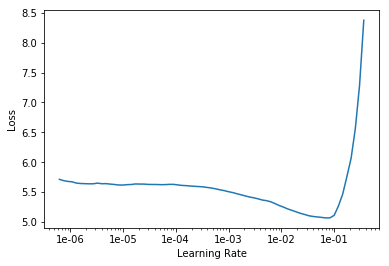

In [33]:
learn.recorder.plot()

In [34]:
learn.freeze()

In [35]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.316343,4.266543,0.328457


In [36]:
learn.save('fit_head', with_opt=True)

In [37]:
learn.load('fit_head', with_opt=True);

In [38]:
learn.unfreeze()

In [39]:
learn.fit_one_cycle(5, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,3.899240,4.148178,0.340400
2,3.713679,4.023550,0.355192
3,3.496711,3.964380,0.364694
4,3.330208,3.946090,0.368978
5,3.207087,3.953995,0.369100


In [40]:
learn.save('fine_tuned', with_opt=True)

In [41]:
learn.load('fine_tuned', with_opt=True);

In [44]:
learn.predict('ਜੋ ਉਹਨਾਂ ਦੇ ਰੱਬਾਂ ਨੂੰ ਪ੍ਰਸਤੁਤ ਕਰਦੇ',n_words=10)

'ਜੋ ਉਹਨਾਂ ਦੇ ਰੱਬਾਂ ਨੂੰ ਪ੍ਰਸਤੁਤ ਕਰਦੇ e a ▁ਅਕਤੂਬਰ , ▁ਕਰੀਬ ▁ਨਵੰਬਰ ▁ਅਤੇ ▁8 39 ▁ਵਿੱਚ'

In [43]:
learn.save_encoder('fine_tuned_enc')

In [45]:
data_clas = TextClasDataBunch.from_csv(path=path, csv_name='Punjabi_Binary_Classification.csv', tokenizer=tokenizer, vocab=panjabi_vocab, text_cols=[0], label_cols=label_cols)

In [46]:
data_clas.show_batch()

text,target
"▁x x bo s ▁ਅਲੀਗੜ੍ਹ ▁ਦੇ ▁ਸਾਧੂਆਂ ▁ਦਾ ▁ਕਤਲ ▁ਅਤੇ ▁ਮੁਸਲਮਾਨਾਂ ▁ਦੇ ▁ਐਨ ਕਾਉਂਟ ਰ ▁ਦਾ ▁ਸੱਚ : ▁b b c ▁i n v e st i g a ti o n ▁ਪ੍ਰਿਯੰ ਕਾ ▁ਦੂ ਬੇ ▁ਬੀਬੀਸੀ ▁ਪੱਤਰਕਾਰ , ▁ਉੱਤਰ ▁ਪ੍ਰਦੇਸ਼ ▁ਤੋਂ ▁ਵਾਪਸ ▁ਆਉਣ ▁' ਤੇ ▁30 ▁ਅਕਤੂਬਰ ▁2018 ▁ਈਮੇਲ ▁ਸਾਂਝਾ ▁ਕਰੋ ▁ਈਮੇਲ ▁ਈਮੇਲ ▁ਲਿੰਕ ▁ਨੂੰ ▁ਕਾਪੀ ▁ਕਰੋ ▁http s : ▁/ ▁/ ▁w ww .",False
"▁x x bo s ▁ਉੱਤਰੀ ▁ਕੋਰੀਆ ▁ਤੋਂ ▁ਭੱਜ ੀਆਂ , ▁ਚੀਨ ▁' ਚ ▁ਸੈਕਸ ▁ਸਕ ੈਂਡ ਲ ▁' ਚ ▁ਫਸ ੀਆਂ ▁ਕੁੜੀਆਂ ▁ਕਿਵੇਂ ▁ਬਚ ▁ਨਿਕਲ ੀਆਂ ▁? ▁ਸੁ - ਮਿਨ ▁ਵੈ ਂਗ ▁ਪੱਤਰਕਾਰ , ▁ਬੀਬੀਸੀ ▁21 ▁ਜਨਵਰੀ ▁ 2019 ▁ਈਮੇਲ ▁ਸਾਂਝਾ ▁ਕਰੋ ▁ਈਮੇਲ ▁ਈਮੇਲ ▁ਲਿੰਕ ▁ਨੂੰ ▁ਕਾਪੀ ▁ਕਰੋ ▁http s : ▁/ ▁/ ▁w ww . bb c . com ▁/ ▁ punjabi ▁/ ▁in tern ational - 46 93",False
"▁x x bo s ▁ਕਿਸਾਨਾਂ ▁ਦੀਆਂ ▁ਖੁਦਕੁਸ਼ੀ ਆਂ ▁ਤੇਲੰਗਾਨਾ ▁' ਚ ▁ਰੁਕ ▁ਸਕਦੀਆਂ ▁ਤਾਂ ▁ਪੰਜਾਬ ▁' ਚ ▁ਕਿਉਂ ▁ਨਹੀਂ ▁: ▁b b c ▁s p e c i al ▁ਪ੍ਰਿ ਅੰਕ ਾ ▁ਦੂ ਬੇ ▁ਬੀਬੀਸੀ ▁ਪੱਤਰਕਾਰ , ▁ਤੇਲੰਗਾਨਾ ▁ਤੋਂ ▁ਵਾਪਸ ▁ਆ ▁ਕੇ ▁3 ▁ਸਤੰਬਰ ▁2018 ▁ਈਮੇਲ ▁ਸਾਂਝਾ ▁ਕਰੋ ▁ਈਮੇਲ ▁ਈਮੇਲ ▁ਲਿੰਕ ▁ਨੂੰ ▁ਕਾਪੀ ▁ਕਰੋ ▁http s : ▁/ ▁/ ▁w ww . bb c . com ▁/",False
▁x x bo s ▁ਦਿ ▁ਐਕਸੀਡੈਂਟ ਲ ▁ਪ੍ਰਾਈਮ ▁ਮਿਨਿਸਟਰ : ▁ ਮਨਮੋਹਨ ▁ਸਿੰਘ ▁ਦੇ ▁ਸਲਾਹਕਾਰ ▁ਨੇ ▁ਅਸਲ ▁' ਚ ▁ਉਨ੍ਹਾਂ ▁ਤੇ ▁ਸੋਨੀਆ ▁ਗਾਂਧੀ ▁ਬਾਰੇ ▁ਆਪਣੀ ▁ਕਿਤਾਬ ▁' ਚ ▁ਕੀ ▁ਲਿਖਿਆ ▁ਰੇ ਹਾਨ ▁ਫ਼ਜ਼ਲ ▁ਬੀਬੀਸੀ ▁ਪੱਤਰਕਾਰ ▁8 ▁ਜਨਵਰੀ ▁ 2019 ▁ਈਮੇਲ ▁ਸਾਂਝਾ ▁ਕਰੋ ▁ਈਮੇਲ ▁ਈਮੇਲ ▁ਲਿੰਕ ▁ਨੂੰ ▁ਕਾਪੀ ▁ਕਰੋ ▁http s : ▁/ ▁/ ▁w ww . bb c . com ▁/ ▁ punjabi ▁/ ▁ india -4 67 86 362,False
"▁x x bo s ▁ਬੁਲੰਦ ਸ਼ਹਿਰ ▁ਹਿੰਸਾ : ▁ਕੀ ▁ਪੁਲਿਸ ▁’ ਤੇ ▁ਹੈ ▁ਯੋਗ ੀ ▁ਸਰਕਾਰ ▁ਦਾ ▁ਦਬਾਅ ? ▁ਪੜ੍ਹ ੋ ▁ਗਰਾਊਂਡ ▁ਰਿਪੋਰਟ ▁ਨਿਤ ਿਨ ▁ਸ਼੍ਰੀਵਾਸਤਵ ▁ਬੀਬੀਸੀ ▁ਪੱਤਰਕਾਰ , ▁ਬੁਲੰਦ ਸ਼ਹਿਰ ▁ਤੋਂ ▁21 ▁ਦਸੰਬਰ ▁2018 ▁ਈਮੇਲ ▁ਸਾਂਝਾ ▁ਕਰੋ ▁ਈਮੇਲ ▁ਈਮੇਲ ▁ਲਿੰਕ ▁ਨੂੰ ▁ਕਾਪੀ ▁ਕਰੋ ▁http s : ▁/ ▁/ ▁w ww . bb c . com ▁/ ▁ punjabi ▁/ ▁ india -4 66 40 6 11 ▁ਸਾਂਝਾ ▁ਕਰਨ ▁ਬਾਰੇ",False


In [47]:
data_clas.sanity_check()

In [48]:
learn = text_classifier_learner(data_clas, drop_mult=0.5)

In [49]:
learn.load_encoder('fine_tuned_enc')

In [50]:
learn.freeze()

In [51]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


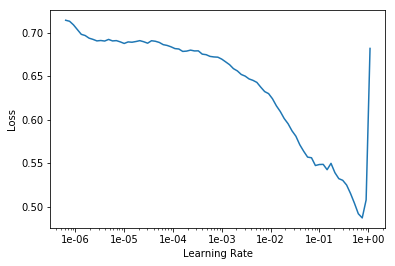

In [52]:
learn.recorder.plot()

In [53]:
learn.loss_func.func

CrossEntropyLoss()

In [54]:
kappa = KappaScore()

In [55]:
learn.metrics = [accuracy, kappa]

In [56]:
learn.fit_one_cycle(1, 1e-1, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,kappa_score
1,0.395519,0.339930,0.815287,0.041675


In [57]:
learn.save('first-full')

In [58]:
learn.load('first-full');

In [59]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,kappa_score
1,0.251283,0.325198,0.834395,0.191363


In [60]:
learn.unfreeze()
learn.fit_one_cycle(5, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,kappa_score
1,0.238795,0.307286,0.840764,0.265669
2,0.217393,0.280138,0.866242,0.425710
3,0.203939,0.269681,0.885350,0.546825
4,0.191916,0.266332,0.878981,0.513932
5,0.185145,0.263177,0.891720,0.603476


In [ ]:
# Todos: Clean the input text a little